In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats
import sklearn.preprocessing
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
import pickle

%matplotlib inline

In [2]:
class PatientData:
    def __init__(self, file, **kwargs):
        self.file = file
        self.df = pd.read_csv(file, sep=kwargs['sep'])
    
    
    def getFile(self, **kwargs):
        return self.file
    
    
    def plotData(self,plottype, **kwargs):
        pass
    
    
    def get_data_frame(self):
        return self.df
    
    
    def add_column_df(self, column_name, feature_arr, new_column_name='-Transformation'):
        #feature_arr_T = feature_arr.transpose()
        #[self.df.insert(loc=df.columns.get_loc(column_name)+1+i, column=column_name[0:2]+str(i), value=new_col) 
                                                #for i, new_col in zip(range(len(feature_arr_T)), feature_arr_T)]
        self.df.insert(loc=self.df.columns.get_loc(column_name)+1, column=column_name+new_column_name, value=feature_arr.tolist())
        #self.df = self.df.assign(e=feature_arr)
        
    
    def show_dataframe(self, n=5):
        display(self.df.head(n))

In [3]:
#Discription of Data
folder_path = '../../../datalcdem/data/lungcancer/Transformation_survival_stage_cls_15July/'
pdata_disc = PatientData(folder_path + 'dataset_description.csv', sep='\t')
pdf_disc = pdata_disc.get_data_frame() 
pdf_disc.shape
cols = pdf_disc.columns
arg_cols_list = []
tmp = []
for col in cols:
    tmp.append(col)
    if 'Transformed' in col:
        arg_cols_list.append(tmp)
        tmp=[]
for mdf in arg_cols_list:
    display(pdf_disc[mdf].head(10))

,Age,Transformed age
0,53,[0 1 0 0]


,Gender,Transformed gender
0,C0025266,[1 0]


,Tumor_Type,Transformed Tumor_type
0,C0001418,[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


,Surv_month,Transformed_surv_month
0,former,[1 0 0 0]


,Chemotherapy,Transformed chemotherapy
0,True,[1 0]


,Tki,Transformed Tki
0,False,[0 1]


,Immunotherapy,Transformed Immunotherapy
0,False,[0 1]


,Antiangiogenic,Transformed Antiangiogenic
0,False,[0 1]


,Radiationtherapy,Transformed Radiationtherapy
0,True,[1 0]


,Surgery,Transformed Surgery
0,False,[0 1]


,Familial antecedent,Transformed Familial_antecedent
0,True,[1 0]


,Systemic Progression,Transformed Systemic Progression
0,False,[0 1]


,Local Progression,Transformed Local Progression
0,False,[0 1]


,Brain Metastasis,Transformed Brain Metastasis
0,False,[0 1]


,Chemoterapy List,Universe of chemotherapy,Transformed Chemoterapy List
0,"['C0008838', 'C0210657', 'C0246415']","['C0015133', 'C0008838', 'C0079083', 'C0078257', 'C0210657', 'C0246415', 'C0045093', 'C0144576']","[0, 1, 0, 0, 1, 1, 0, 0]"


,Familial antecedent List,Universe of familial antecedent,Transformed Familial antecedent List
0,['C0026591'],"['C0337578', 'C0015671', 'C1273524', 'C0337576', 'C0011011', 'C1273523', 'C3844805', 'C0080103', 'C1273525', 'C0337582', 'C0337527', 'C0015576', 'C0337514', 'C1273522', 'C0337581', 'C0337577', 'C0337579', 'C0026591', 'C0037047']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]"


,Immunotherapy List,Universe of Immunotherapy,Transformed Immunotherapy List
0,[],"['C3658706', 'C1367202', 'C3657270']","[0, 0, 0]"


,Tki List,Universe of Tki,Transformed Tki List
0,[],"['C2974289', 'C4058811', 'C3853921', 'C3896906', 'C1135135', 'C3818721', 'C1122962', 'C2987648']","[0, 0, 0, 0, 0, 0, 0, 0]"


,Comorbidities List,Universe of Comorbidities,Transformed Comorbidities List
0,"['C0030193', 'C0231857']","['C0263236', 'C0242339', 'C0042075', 'C0035508', 'C0740394', 'C0149871', 'C0024117', 'C0030193', 'C0497156', 'C0013404', 'C0020676', 'C0011849', 'C0034067', 'C0020538', 'C0002871', 'C0010200', 'C0013604', 'C0919930', 'C0006318', 'C0231857', 'C0018799', 'C0020443']","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"


,Drugs List,Universe of Drugs,Transformed Drugs List
0,['Antibiotic'],"['Steroid', 'Antiemetic', 'Anticoagulant', 'Antihyperuricemic', 'Gastric_protector', 'Benzodiazepine', 'Other', 'Antihypertensive', 'Analgesic', 'Diuretic', 'Antibiotic', 'Pain_killer', 'Dyslipidemic', 'Bronchodilator', 'Antidiabetic']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


,Non_oncologycal_treat List,Universe of Non_oncologycal_treat,Transformed Non_oncologycal_treat List
0,['C0007546'],"['C0012586', 'C0024002', 'C0026056', 'C0286651', 'C0020852', 'C0014025', 'C0025853', 'C0052796', 'C0021641', 'C0011777', 'C0051696', 'C0030049', 'C0025815', 'C0008809', 'C0772505', 'C0001617', 'C0002771', 'C0020740', 'C0025598', 'C0028978', 'C0206460', 'C0007561', 'C0065185', 'C0026549', 'C0016860', 'C0006213', 'C0040610', 'C0007546', 'C0074554', 'C0003232', 'C0001927', 'C0004147', 'C0019134', 'C0000970', 'C0013136', 'C0282386', 'C0002144', 'C0034665', 'C0002645', 'C0073631', 'C0015846', 'C0061851', 'C0032952']","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


,Biopsy List,Universe of Biopsy,Transformed Biopsy List
0,[],"{'egfr_l861q', 'egfr_l858r', 'egfr_del19', 'egfr_t790m', 'egfr_g719x', 'egfr_ins20', 'unknown'}","[0, 0, 0, 0, 0, 0, 0]"


,Perform_status List,Universe of Perform_status,Transformed Perform_status
0,1.0,"['0', '1', '2', '3', '4', '5']",[0 1 0 0 0 0]


,Stage List,Universe of Stage,Transformed Stage
0,C0441772,"['C0441766', 'C0441767', 'C0441771', 'C0441772']",[0 0 0 1]


,Toxicities List,Universe of Toxicities,Transformed toxicities
0,"['C0004093', 'C0004093', 'C0004093', 'C0020517', 'C0004093', 'C0027497', 'C0042963', 'C0333355', 'C0027497', 'C0333355', 'C0333355', 'C0333355', 'C0333355', 'C0333355', 'C0027497', 'C0004093', 'C0232462', 'C0027497', 'C0333355', 'C0333355', 'C0020517', 'C0027497', 'C0020517', 'C2242708', 'C0232462', 'C0002871', 'C2242708', 'C0232462', 'C0002871', 'C2242708', 'C0232462', 'C0002871', 'C2242708', 'C0232462', 'C0002871', 'C0019158', 'C2242708', 'C0232462', 'C0027497', 'C0002871', 'C0019158', 'C2242708', 'C0232462', 'C0042963', 'C0002871', 'C2242708', 'C0002871', 'C2242708', 'C0027497', 'C0002871', 'C2242708', 'C0002871', 'C2242708', 'C0002871', 'C2242708']","['C0232462', 'C0035078', 'C0858733', 'C0002170', 'C0009319', 'C0038363', 'C0001403', 'C0001623', 'C0033774', 'C2363731', 'C0011053', 'C0026848', 'C0015230', 'C0042963', 'C0019158', 'C0032285', 'C0746883', 'C0020517', 'C0027697', 'C0009763', 'C0027947', 'C2242708', 'C0013378', 'C0027497', 'C0002792', 'C0011603', 'C0270994', 'C0010481', 'C0030305', 'C0020676', 'C0333355', 'C0438717', 'C0004093', 'C0332601', 'C0011991', 'C0342409', 'C2364111', 'C0019080', 'C0235032', 'C0042900', 'C0002871', 'C0020433', 'C0040034', 'C0235280', 'C0002594', 'C0162834', 'C1384666', 'C0003123', 'C0235378', 'C0599918', 'C0014356', 'C0020550']","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [4]:
# To know numberof empty feature in that data
t = pdf_disc.applymap(lambda x : True if x == str([]) else False).agg(['sum'],axis=1).iloc[:,0]

print(pdf_disc['patient_id'].shape, t.shape)

pdf_disc_emptyvalue = pd.DataFrame(data= {'patient_id':pdf_disc['patient_id'], 'EmptyValues':t})

display(pdf_disc_emptyvalue.head(5))

display( pdf_disc_emptyvalue['EmptyValues'].describe())

pdf_disc_emptyvalue.hist(column=['EmptyValues'], bins=20)

,patient_id,gender-C0025266,gender-C0043210,smok-current,smok-None,smok-no,smok-former,radiationth-True,radiationth-False,antiangiog-True,antiangiog-False,surgery-True,surgery-False,familial_antec-True,familial_antec-False,brainMetast-True,brainMetast-False,chemoth-C0078257,chemoth-C0210657,chemoth-C0045093,chemoth-C0144576,chemoth-C0008838,chemoth-C0079083,chemoth-C0246415,chemoth-C0015133,immunoth-C3658706,immunoth-C3657270,immunoth-C1367202,tki-C3853921,tki-C1135135,tki-C2974289,tki-C2987648,tki-C3818721,tki-C4058811,tki-C1122962,comorbiditi-C0035508,comorbiditi-C0020538,comorbiditi-C0042075,comorbiditi-C0149871,comorbiditi-C0013604,comorbiditi-C0740394,comorbiditi-C0030193,comorbiditi-C0497156,comorbiditi-C0020443,comorbiditi-C0024117,comorbiditi-C0011849,comorbiditi-C0242339,comorbiditi-C0020676,comorbiditi-C0013404,comorbiditi-C0006318,comorbiditi-C0018799,comorbiditi-C0263236,comorbiditi-C0034067,comorbiditi-C0002871,comorbiditi-C0919930,comorbiditi-C0231857,comorbiditi-C0010200,mutation-unknown,mutation-egfr_del19,mutation-egfr_t790m,mutation-egfr_ins20,mutation-egfr_l861q,mutation-egfr_l858r,mutation-egfr_g719x,status-0,status-1,status-2,status-3,status-4,status-5,non_oncologycal_treatme-C0002645,non_oncologycal_treatme-C0030049,non_oncologycal_treatme-C0020852,non_oncologycal_treatme-C0051696,non_oncologycal_treatme-C0052796,non_oncologycal_treatme-C0012586,non_oncologycal_treatme-C0011777,non_oncologycal_treatme-C0024002,non_oncologycal_treatme-C0286651,non_oncologycal_treatme-C0000970,non_oncologycal_treatme-C0007561,non_oncologycal_treatme-C0002771,non_oncologycal_treatme-C0020740,non_oncologycal_treatme-C0073631,non_oncologycal_treatme-C0006213,non_oncologycal_treatme-C0028978,non_oncologycal_treatme-C0002144,non_oncologycal_treatme-C0026056,non_oncologycal_treatme-C0065185,non_oncologycal_treatme-C0001617,non_oncologycal_treatme-C0016860,non_oncologycal_treatme-C0014025,non_oncologycal_treatme-C0026549,non_oncologycal_treatme-C0007546,non_oncologycal_treatme-C0008809,non_oncologycal_treatme-C0772505,non_oncologycal_treatme-C0074554,non_oncologycal_treatme-C0003232,non_oncologycal_treatme-C0015846,non_oncologycal_treatme-C0019134,non_oncologycal_treatme-C0040610,non_oncologycal_treatme-C0061851,non_oncologycal_treatme-C0004147,non_oncologycal_treatme-C0001927,non_oncologycal_treatme-C0034665,non_oncologycal_treatme-C0025598,non_oncologycal_treatme-C0021641,non_oncologycal_treatme-C0206460,non_oncologycal_treatme-C0282386,non_oncologycal_treatme-C0032952,stage-C0441766,stage-C0441767,stage-C0441771,stage-C0441772,toxicities-C0026848,toxicities-C0002170,toxicities-C0162834,toxicities-C0746883,toxicities-C0015230,toxicities-C2363731,toxicities-C0270994,toxicities-C0599918,toxicities-C0002792,toxicities-C0038363,toxicities-C0027697,toxicities-C0004093,toxicities-C0019080,toxicities-C0035078,toxicities-C0009763,toxicities-C0042900,toxicities-C0438717,toxicities-C0011053,toxicities-C0032285,toxicities-C0020550,toxicities-C0235032,toxicities-C0333355,toxicities-C0858733,toxicities-C0014356,toxicities-C0040034,toxicities-C1384666,toxicities-C0235378,toxicities-C0027497,toxicities-C0001623,toxicities-C0020676,toxicities-C0033774,toxicities-C0235280,toxicities-C0342409,toxicities-C0020517,toxicities-C0002594,toxicities-C0011991,toxicities-C0019158,toxicities-C0009319,toxicities-C0013378,toxicities-C2242708,toxicities-C0003123,toxicities-C0027947,toxicities-C0011603,toxicities-C0030305,toxicities-C0002871,toxicities-C0332601,toxicities-C0020433,toxicities-C0232462,toxicities-C0042963,toxicities-C0010481
0,1003706,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0
1,1007602,1,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

Index(['patient_id', 'gender-C0025266', 'gender-C0043210', 'smok-current',
       'smok-None', 'smok-no', 'smok-former', 'radiationth-True',
       'radiationth-False', 'antiangiog-True',
       ...
       'toxicities-C0003123', 'toxicities-C0027947', 'toxicities-C0011603',
       'toxicities-C0030305', 'toxicities-C0002871', 'toxicities-C0332601',
       'toxicities-C0020433', 'toxicities-C0232462', 'toxicities-C0042963',
       'toxicities-C0010481'],
      dtype='object', length=164)

In [6]:
# LCPatientData_Label
pdataLabel = PatientData(folder_path + 'dataset_description.csv', sep='\t')
#pdataLabel.show_dataframe()
display(pdataLabel.get_data_frame().describe(include='all'))

pdf_label = pdataLabel.get_data_frame()[['patient_id','survival_month', 'survival_class', 'survival_label', 'survival_more_2years', 'survival_less_2months', 'survival_less_1months']]
pdf_label.head(20)

,patient_id,gender,diagnosisDate,tumorType,stageAtDiagnosis,ageAtDiagnosis,performanceStatusAtDiagnosis,smoker,biomarkers,bioEgfr,bioAlk,bioRos1,chemotherapy,tki,immunotherapy,antiangiogenic,radiationtherapy,surgery,familialAntecedents,systemicProgression,localProgression,brainMetastasis,survivalMonths
0,1003706,C0025266,2017-04-03,C0001418,C0441772,53,1.0,former,False,False,False,False,True,False,False,False,True,False,True,False,False,False,4
1,1007602,C0025266,2016-02-23,C0007097,C0441772,70,1.0,current,False,False,False,False,True,False,False,False,True,False,True,False,False,True,2
2,1013426,C0025266,2014-03-24,C0152013,C0441772,48,0.0,no,True,True,False,False,False,True,False,False,True,False,False,False,False,False,12
3,1013702,C0043210,2016-03-03,C0152013,C0441772,76,2.0,current,False,False,False,False,True,False,False,False,True,False,False,False,False,False,0
4,1015121,C0025266,2015-08-06,C0152013,C0441772,55,0.0,former,False,False,False,False,True,False,True,False,True,True,True,False,False,False,15


,patient_id,gender,diagnosisDate,tumorType,stageAtDiagnosis,ageAtDiagnosis,performanceStatusAtDiagnosis,smoker,biomarkers,bioEgfr,bioAlk,bioRos1,chemotherapy,tki,immunotherapy,antiangiogenic,radiationtherapy,surgery,familialAntecedents,systemicProgression,localProgression,brainMetastasis,survivalMonths
count,9.390000e+02,939,939,939,939,939.000000,732.000000,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939,939.000000
unique,NaN,2,751,17,4,NaN,NaN,4,2,2,2,1,2,2,2,2,2,2,2,2,2,2,NaN
top,NaN,C0025266,2016-11-18,C0152013,C0441772,NaN,NaN,former,False,False,False,False,True,False,False,False,True,True,True,False,False,False,NaN
freq,NaN,663,5,183,526,NaN,NaN,695,821,848,912,939,655,823,818,916,615,488,516,769,864,744,NaN
mean,1.310331e+06,NaN,NaN,NaN,NaN,65.785942,0.655738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.733759
std,9.707625e+05,NaN,NaN,NaN,NaN,9.296007,0.837923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.706415
min,3.877000e+03,NaN,NaN,NaN,NaN,30.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5.101020e+05,NaN,NaN,NaN,NaN,59.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
50%,1.007602e+06,NaN,NaN,NaN,NaN,66.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000
75%,2.463002e+06,NaN,NaN,NaN,NaN,72.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000


,patient_id,survivalMonths
0,1003706,4
1,1007602,2
2,1013426,12
3,1013702,0
4,1015121,15


In [ ]:
# Transformed LCPatientData
file_name = 'dataset_LCPatient'

pdata = PatientData(folder_path + file_name + '.csv', sep=',')
pdata.show_dataframe(n=20)
pdf = pdata.get_data_frame() 
display(pdf.columns, pdf.shape)
display(pdf.describe())

#Sorted patient_id
pdf.sort_values(by=['patient_id']).head(20)

[array([ 1.,  5., 13., 25., 59.])]


4    19
Name: surv_month, dtype: int64

5    19
Name: survivalMonths, dtype: int64

,patient_id,surv_month,survivalMonthsCat,survivalMonthsCatBin,gender-C0025266,gender-C0043210,smok-current,smok-None,smok-no,smok-former,radiationth-True,radiationth-False,antiangiog-True,antiangiog-False,surgery-True,surgery-False,familial_antec-True,familial_antec-False,brainMetast-True,brainMetast-False,chemoth-C0078257,chemoth-C0210657,chemoth-C0045093,chemoth-C0144576,chemoth-C0008838,chemoth-C0079083,chemoth-C0246415,chemoth-C0015133,immunoth-C3658706,immunoth-C3657270,immunoth-C1367202,tki-C3853921,tki-C1135135,tki-C2974289,tki-C2987648,tki-C3818721,tki-C4058811,tki-C1122962,comorbiditi-C0035508,comorbiditi-C0020538,comorbiditi-C0042075,comorbiditi-C0149871,comorbiditi-C0013604,comorbiditi-C0740394,comorbiditi-C0030193,comorbiditi-C0497156,comorbiditi-C0020443,comorbiditi-C0024117,comorbiditi-C0011849,comorbiditi-C0242339,comorbiditi-C0020676,comorbiditi-C0013404,comorbiditi-C0006318,comorbiditi-C0018799,comorbiditi-C0263236,comorbiditi-C0034067,comorbiditi-C0002871,comorbiditi-C0919930,comorbiditi-C0231857,comorbiditi-C0010200,mutation-unknown,mutation-egfr_del19,mutation-egfr_t790m,mutation-egfr_ins20,mutation-egfr_l861q,mutation-egfr_l858r,mutation-egfr_g719x,status-0,status-1,status-2,status-3,status-4,status-5,non_oncologycal_treatme-C0002645,non_oncologycal_treatme-C0030049,non_oncologycal_treatme-C0020852,non_oncologycal_treatme-C0051696,non_oncologycal_treatme-C0052796,non_oncologycal_treatme-C0012586,non_oncologycal_treatme-C0011777,non_oncologycal_treatme-C0024002,non_oncologycal_treatme-C0286651,non_oncologycal_treatme-C0000970,non_oncologycal_treatme-C0007561,non_oncologycal_treatme-C0002771,non_oncologycal_treatme-C0020740,non_oncologycal_treatme-C0073631,non_oncologycal_treatme-C0006213,non_oncologycal_treatme-C0028978,non_oncologycal_treatme-C0002144,non_oncologycal_treatme-C0026056,non_oncologycal_treatme-C0065185,non_oncologycal_treatme-C0001617,non_oncologycal_treatme-C0016860,non_oncologycal_treatme-C0014025,non_oncologycal_treatme-C0026549,non_oncologycal_treatme-C0007546,non_oncologycal_treatme-C0008809,non_oncologycal_treatme-C0772505,non_oncologycal_treatme-C0074554,non_oncologycal_treatme-C0003232,non_oncologycal_treatme-C0015846,non_oncologycal_treatme-C0019134,non_oncologycal_treatme-C0040610,non_oncologycal_treatme-C0061851,non_oncologycal_treatme-C0004147,non_oncologycal_treatme-C0001927,non_oncologycal_treatme-C0034665,non_oncologycal_treatme-C0025598,non_oncologycal_treatme-C0021641,non_oncologycal_treatme-C0206460,non_oncologycal_treatme-C0282386,non_oncologycal_treatme-C0032952,stage-C0441766,stage-C0441767,stage-C0441771,stage-C0441772,toxicities-C0026848,toxicities-C0002170,toxicities-C0162834,toxicities-C0746883,toxicities-C0015230,toxicities-C2363731,toxicities-C0270994,toxicities-C0599918,toxicities-C0002792,toxicities-C0038363,toxicities-C0027697,toxicities-C0004093,toxicities-C0019080,toxicities-C0035078,toxicities-C0009763,toxicities-C0042900,toxicities-C0438717,toxicities-C0011053,toxicities-C0032285,toxicities-C0020550,toxicities-C0235032,toxicities-C0333355,toxicities-C0858733,toxicities-C0014356,toxicities-C0040034,toxicities-C1384666,toxicities-C0235378,toxicities-C0027497,toxicities-C0001623,toxicities-C0020676,toxicities-C0033774,toxicities-C0235280,toxicities-C0342409,toxicities-C0020517,toxicities-C0002594,toxicities-C0011991,toxicities-C0019158,toxicities-C0009319,toxicities-C0013378,toxicities-C2242708,toxicities-C0003123,toxicities-C0027947,toxicities-C0011603,toxicities-C0030305,toxicities-C0002871,toxicities-C0332601,toxicities-C0020433,toxicities-C0232462,toxicities-C0042963,toxicities-C0010481
0,1003706,4,0.0,"[1.0, 5.0)",1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0
1,1007602,2,0.0,"[1.0, 

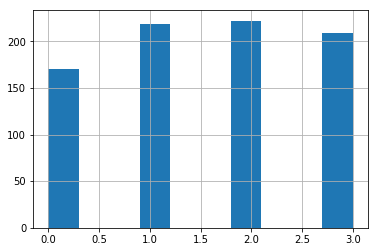

In [12]:
pdf_data.iloc[:,4:-1].describe()

,gender-C0025266,gender-C0043210,smok-current,smok-None,smok-no,smok-former,radiationth-True,radiationth-False,antiangiog-True,antiangiog-False,surgery-True,surgery-False,familial_antec-True,familial_antec-False,brainMetast-True,brainMetast-False,chemoth-C0078257,chemoth-C0210657,chemoth-C0045093,chemoth-C0144576,chemoth-C0008838,chemoth-C0079083,chemoth-C0246415,chemoth-C0015133,immunoth-C3658706,immunoth-C3657270,immunoth-C1367202,tki-C3853921,tki-C1135135,tki-C2974289,tki-C2987648,tki-C3818721,tki-C4058811,tki-C1122962,comorbiditi-C0035508,comorbiditi-C0020538,comorbiditi-C0042075,comorbiditi-C0149871,comorbiditi-C0013604,comorbiditi-C0740394,comorbiditi-C0030193,comorbiditi-C0497156,comorbiditi-C0020443,comorbiditi-C0024117,comorbiditi-C0011849,comorbiditi-C0242339,comorbiditi-C0020676,comorbiditi-C0013404,comorbiditi-C0006318,comorbiditi-C0018799,comorbiditi-C0263236,comorbiditi-C0034067,comorbiditi-C0002871,comorbiditi-C0919930,comorbiditi-C0231857,comorbiditi-C0010200,mutation-unknown,mutation-egfr_del19,mutation-egfr_t790m,mutation-egfr_ins20,mutation-egfr_l861q,mutation-egfr_l858r,mutation-egfr_g719x,status-0,status-1,status-2,status-3,status-4,status-5,non_oncologycal_treatme-C0002645,non_oncologycal_treatme-C0030049,non_oncologycal_treatme-C0020852,non_oncologycal_treatme-C0051696,non_oncologycal_treatme-C0052796,non_oncologycal_treatme-C0012586,non_oncologycal_treatme-C0011777,non_oncologycal_treatme-C0024002,non_oncologycal_treatme-C0286651,non_oncologycal_treatme-C0000970,non_oncologycal_treatme-C0007561,non_oncologycal_treatme-C0002771,non_oncologycal_treatme-C0020740,non_oncologycal_treatme-C0073631,non_oncologycal_treatme-C0006213,non_oncologycal_treatme-C0028978,non_oncologycal_treatme-C0002144,non_oncologycal_treatme-C0026056,non_oncologycal_treatme-C0065185,non_oncologycal_treatme-C0001617,non_oncologycal_treatme-C0016860,non_oncologycal_treatme-C0014025,non_oncologycal_treatme-C0026549,non_oncologycal_treatme-C0007546,non_oncologycal_treatme-C0008809,non_oncologycal_treatme-C0772505,non_oncologycal_treatme-C0074554,non_oncologycal_treatme-C0003232,non_oncologycal_treatme-C0015846,non_oncologycal_treatme-C0019134,non_oncologycal_treatme-C0040610,non_oncologycal_treatme-C0061851,non_oncologycal_treatme-C0004147,non_oncologycal_treatme-C0001927,non_oncologycal_treatme-C0034665,non_oncologycal_treatme-C0025598,non_oncologycal_treatme-C0021641,non_oncologycal_treatme-C0206460,non_oncologycal_treatme-C0282386,non_oncologycal_treatme-C0032952,stage-C0441766,stage-C0441767,stage-C0441771,stage-C0441772,toxicities-C0026848,toxicities-C0002170,toxicities-C0162834,toxicities-C0746883,toxicities-C0015230,toxicities-C2363731,toxicities-C0270994,toxicities-C0599918,toxicities-C0002792,toxicities-C0038363,toxicities-C0027697,toxicities-C0004093,toxicities-C0019080,toxicities-C0035078,toxicities-C0009763,toxicities-C0042900,toxicities-C0438717,toxicities-C0011053,toxicities-C0032285,toxicities-C0020550,toxicities-C0235032,toxicities-C0333355,toxicities-C0858733,toxicities-C0014356,toxicities-C0040034,toxicities-C1384666,toxicities-C0235378,toxicities-C0027497,toxicities-C0001623,toxicities-C0020676,toxicities-C0033774,toxicities-C0235280,toxicities-C0342409,toxicities-C0020517,toxicities-C0002594,toxicities-C0011991,toxicities-C0019158,toxicities-C0009319,toxicities-C0013378,toxicities-C2242708,toxicities-C0003123,toxicities-C0027947,toxicities-C0011603,toxicities-C0030305,toxicities-C0002871,toxicities-C0332601,toxicities-C0020433,toxicities-C0232462,toxicities-C0042963
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,82

In [15]:
pdf_data.shape

(820, 167)